In [1]:
import pandas as pd
import numpy as np

In [2]:
retail=pd.read_excel("online retail.xlsx")

In [3]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [4]:
df=retail.sample(n=50000)

In [5]:
df.head(6)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
50156,494014,84249D,FAIRY CAKE GREETINGS CARD,1,2010-01-11 09:33:00,0.86,NaN,United Kingdom
73692,496054,20671,BLUE TEATIME PRINT BOWL,8,2010-01-28 14:39:00,1.25,15544.0,United Kingdom
509997,536987,22753,SMALL YELLOW BABUSHKA NOTEBOOK,1,2010-12-03 14:54:00,0.85,17198.0,United Kingdom
504537,536544,22539,MINI JIGSAW DOLLY GIRL,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
74358,C496118,M,Manual,-1,2010-01-29 11:06:00,1065.54,17940.0,United Kingdom
371713,525260,22727,ALARM CLOCK BAKELIKE RED,4,2010-10-04 15:41:00,3.75,13021.0,United Kingdom


In [6]:
df.shape

(50000, 8)

In [7]:
df.rename(columns = {'Customer ID':'CustomerID'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 50156 to 60941
Data columns (total 8 columns):
Invoice        50000 non-null object
StockCode      50000 non-null object
Description    49715 non-null object
Quantity       50000 non-null int64
InvoiceDate    50000 non-null datetime64[ns]
Price          50000 non-null float64
CustomerID     39608 non-null float64
Country        50000 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.4+ MB


The dataset consists of 525461 rows and 8 columns. 
Going through the columns there are some NaN or missing values in the CustomerID 
column as it only has 417534 values hence we have 1,07,927‬ NaN values.
Column Description has missing values as it only has 522533 that means 2,928 NaN values. 
‬

In [9]:
print("Number of transactions: ", df['Invoice'].nunique())
print("Number of products bought: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  15258
Number of products bought:  3622
Number of customers: 3779
Percentage of customers NA:  20.78 %
Number of countries:  40


In [10]:
df.describe()

,Quantity,Price,CustomerID
count,50000.000000,50000.00000,39608.000000
mean,10.447320,4.98857,15357.572031
std,124.484065,78.35935,1680.212911
min,-9360.000000,0.00000,12346.000000
25%,1.000000,1.25000,13979.000000
50%,3.000000,2.10000,15311.000000
75%,10.000000,4.21000,16797.000000
max,19152.000000,10468.80000,18287.000000


In [11]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
count,50000.0,50000,49715,50000.000000,50000,50000.00000,39608.000000,50000
unique,15258.0,3622,3782,NaN,14472,NaN,NaN,40
top,538071.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-09 14:09:00,NaN,NaN,United Kingdom
freq,68.0,332,335,NaN,68,NaN,NaN,46294
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2010-12-09 20:01:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.447320,NaN,4.98857,15357.572031,NaN
std,NaN,NaN,NaN,124.484065,NaN,78.35935,1680.212911,NaN
min,NaN,NaN,NaN,-9360.000000,NaN,0.00000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.25000,13979.000000,NaN


### Cancelled Transactions/Invoice

In [12]:
cancelled_orders = df[df['Invoice'].astype(str).str.contains('C')]
cancelled_orders.head()
len(cancelled_orders) #No of cancelled orders

952

In [13]:
total=df['Invoice'].unique()
print("Cancelled Orders Percentage: ",len(cancelled_orders)/len(total)*100,"%")

Cancelled Orders Percentage:  6.239349849259405 %


In [14]:
import matplotlib.pyplot as plt
df.isna().sum()

Invoice            0
StockCode          0
Description      285
Quantity           0
InvoiceDate        0
Price              0
CustomerID     10392
Country            0
dtype: int64

In [15]:
df.fillna(method="bfill",inplace=True)
df.fillna(method="ffill",inplace=True)

In [16]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [17]:
df.corr(method="pearson")

,Quantity,Price,CustomerID
Quantity,1.000000,-0.003488,-0.010272
Price,-0.003488,1.000000,-0.003950
CustomerID,-0.010272,-0.003950,1.000000


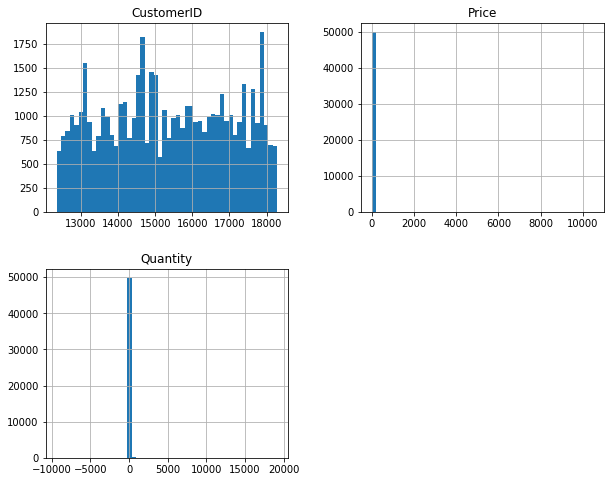

In [18]:
df.hist(bins=50,sharey=False, sharex=False, figsize=(10,8))
plt.show()

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression(normalize=True)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [20]:
df.drop("Description",axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 50156 to 60941
Data columns (total 7 columns):
Invoice        50000 non-null object
StockCode      50000 non-null object
Quantity       50000 non-null int64
InvoiceDate    50000 non-null datetime64[ns]
Price          50000 non-null float64
CustomerID     50000 non-null float64
Country        50000 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 3.1+ MB


In [22]:
df['Invoice']=df['Invoice'].astype(str)
df['StockCode']=df['Invoice'].astype(str)
df['Country']=df['Country'].astype(str)
df['InvoiceDate']=df['InvoiceDate'].astype(str)

In [23]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Invoice'] = label_encoder.fit_transform(df['Invoice'])
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['InvoiceDate']=label_encoder.fit_transform(df['InvoiceDate'])

In [24]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# lb_make = LabelEncoder()
# df['Invoice'] = df['Invoice'].cat.codes

In [25]:
df.dtypes

Invoice          int32
StockCode        int32
Quantity         int64
InvoiceDate      int32
Price          float64
CustomerID     float64
Country          int32
dtype: object

In [26]:
Y=df[['Invoice']]     # iloc[:,0]
X=df.iloc[:,1:]
# print(X)
X.shape,Y.shape

((50000, 6), (50000, 1))

In [27]:
from sklearn.model_selection import train_test_split
seed=10
test_size=0.3
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)

In [28]:
X_train.shape,X_test.shape,y_train.shape

((35000, 6), (15000, 6), (35000, 1))

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regression=LinearRegression()

In [31]:
# X_train= X_train.values.reshape(-1,1)
# y_train= y_train.reshape(1, -1)
# X_test = X_test.values.reshape(-1,1)
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(regression.intercept_)

[-9.09494702e-13]


In [33]:
regression.coef_

array([[1.00000000e+00, 1.19614170e-17, 4.98140741e-16, 8.14288109e-18,
        9.65637999e-17, 4.64695172e-16]])

In [34]:
X_test.isna().sum()
# np.where(np.isnan(X_test))
# # np.nan_to_num(X_test)
# X_test.dropna(inplace=True)

StockCode      0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [35]:
y_pred= regression.predict(X_test)

In [36]:
# plt.scatter(y_test,y_pred)
# import seaborn as sns
# sns.distplot((y_test-y_pred),bins=50)

In [37]:
y_train_pred=regression.predict(X_train)

In [38]:
RMSE_Train=np.sqrt(np.mean(((y_train - y_train_pred)**2)))
print("Training RMSE:",RMSE_Train)

Training RMSE: Invoice    7.553852e-13
dtype: float64


In [39]:
import statsmodels.formula.api as smf
model=smf.ols(formula="""Invoice~StockCode+Quantity+InvoiceDate+Price+CustomerID+Country""",data=df)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Invoice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.220e+33
Date:                Fri, 03 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:03:08   Log-Likelihood:             1.2038e+06
No. Observations:               50000   AIC:                        -2.408e+06
Df Residuals:                   49993   BIC:                        -2.407e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.095e-13   3.75e-13      2.423      

# VIF

In [40]:
X = df[['StockCode','Quantity','InvoiceDate','Price','CustomerID']] # x4 variable drop.
Y = df['Invoice']
# Invoice~StockCode+Quantity+InvoiceDate+Price+CustomerID+Country
regression.fit(X, Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(regression.intercept_, regression.coef_)

-7.275957614183426e-12 [ 1.00000000e+00 -1.48865556e-17  5.95250149e-17  6.63369115e-18
 -3.41407073e-17]


In [42]:
print(regression.score(X,Y))

1.0


In [43]:
import statsmodels.api as sm
X = sm.add_constant(X)
regr2 = sm.OLS(Y,X)
model = regr2.fit()
print(model.summary())
ypred = regr2.predict(model.params)

                            OLS Regression Results                            
Dep. Variable:                Invoice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.067e+33
Date:                Fri, 03 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:03:08   Log-Likelihood:             1.2243e+06
No. Observations:               50000   AIC:                        -2.449e+06
Df Residuals:                   49994   BIC:                        -2.449e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.509e-11   2.35e-13    -64.292      

C:\Users\sneha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [44]:
# X = df[['StockCode','Quantity','InvoiceDate','Price','CustomerID']] # x4 variable drop.
# Y = df['Invoice']
# # Invoice~StockCode+Quantity+InvoiceDate+Price+CustomerID+Country
# regression.fit(X, Y) 

In [45]:
# print(regression.intercept_, regression.coef_)

In [46]:
# print(regression.score(X,Y))

In [47]:
# import statsmodels.api as sm
# X = sm.add_constant(X)
# regr2 = sm.OLS(Y,X)
# model = regr2.fit()
# print(model.summary())
# ypred = regr2.predict(model.params)

## SVR (Support Vector Regressor)

In [48]:
X_train.shape, y_train.shape

((35000, 6), (35000, 1))

In [49]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [75]:
SupportVectorRegModel=SVR(kernel='linear')
SupportVectorRegModel.fit(X_train,y_train)

C:\Users\sneha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [76]:
y_pred=SupportVectorRegModel.predict(X_test)

In [77]:
MSE=mean_squared_error(y_test,y_pred)

In [78]:
RMSE=np.sqrt(MSE)

In [79]:
print("MSE:",MSE)
print("RMSE:",RMSE)

MSE: 350135.1722602849
RMSE: 591.7222086927994


In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9817000691715909

## PCR

In [64]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [65]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 

In [67]:
reg=LinearRegression(normalize=False)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print('Coefficient: \n',reg.coef_)
print('Intercept: \n',reg.intercept_)

Coefficient: 
 [[3089.45446153   11.94396925]]
Intercept: 
 [7444.57317143]


In [69]:
y_test_pred=reg.predict(X_test)

In [70]:
MSE_Test=np.sqrt(np.mean((np.array(y_test) -np.array(y_test_pred))**2))
print("MSE_Test:",MSE_Test)

MSE_Test: 588.4054235893431


In [71]:
print("RMSE:",(MSE_Test**2))

RMSE: 346220.9425093542


In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9819046476868715